<a href="https://colab.research.google.com/github/kh-ops69/ML_NLP/blob/master/sentiment_analysis_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
train_set = pd.read_csv("train.csv", encoding="ISO-8859-1")

In [ ]:
train_set.sample(5)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
6066,e7702ae8f2,awesomeness,awesomeness,positive,morning,0-20,Malawi,19129952,94280.0,203
21481,dbf367564f,up way too early for a sunday.. watching old e...,up way too early for a sunday.. watching old e...,neutral,noon,21-30,Somalia,15893222,627340.0,25
14246,ebda3686bc,i like this Dr. Seuss quote - Ã¯Â¿Â½You know y...,i like this Dr. Seuss quote - Ã¯Â¿Â½You know y...,positive,night,31-45,Morocco,36910560,446300.0,83
26398,780e59bcd7,"wow, atleast u only have three weeks...I have...","wow,",positive,noon,60-70,Kenya,53771296,569140.0,94
27420,24fa941c24,I would but you`re too far away,too far away,negative,morning,0-20,Austria,9006398,82400.0,109


In [ ]:
target_map = {'positive':1, 'negative':-1, 'neutral':0}
train_set['sentiment_val']= train_set.sentiment.map(target_map)

In [ ]:
train_set.sample(5)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),sentiment_val
19512,4aef4d5752,sweet! make sure to put some in your bag for me,sweet!,positive,morning,0-20,Haiti,11402528,27560.0,414,1
17672,ca4b7d62c0,anytime!.. literally hahaha,anytime!.. literally hahaha,neutral,night,31-45,Czechia (Czech Republic),10708981,77240.0,139,0
26385,9f03acc2ae,history project,history project,neutral,morning,46-60,Hungary,9660351,90530.0,107,0
22147,53729a85b5,so make the most of it enjoy,enjoy,positive,noon,21-30,Montenegro,628066,13450.0,47,1
9728,f0dd6aa1cd,lost luggage? Sorry to hear. you should chec...,Sorry,negative,night,31-45,Guyana,786552,196850.0,4,-1


<Axes: >

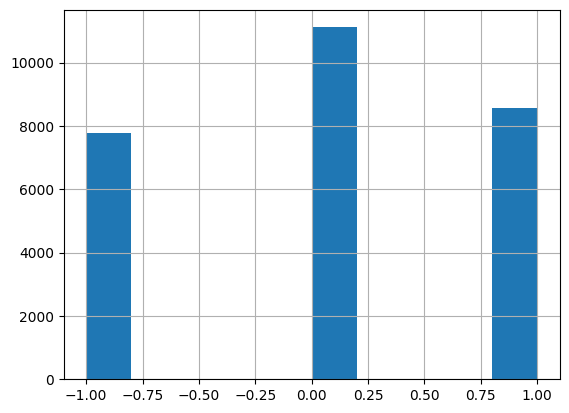

In [ ]:
train_set.sentiment_val.hist()

In [ ]:
vectorizer = TfidfVectorizer(max_features = 3500)
initial_features = vectorizer.fit_transform(train_set.text.values.astype('U'))

In [ ]:
initial_features = initial_features.toarray()

In [ ]:
initial_features.shape

(27481, 3500)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(initial_features, train_set.sentiment_val, test_size=0.4)

In [ ]:
logr = LogisticRegression()
logr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logr.score(x_train, y_train), logr.score(x_test, y_test)

(0.771166909267346, 0.6876193941599199)

In [ ]:
# roc_auc_score is higher than normal accuracy score only because accuracy
# judges the overall performance of the model by checking correct predictions vs
# number of predictions made. it can be influenced by the majority class if there
# is a class imbalance. on the other hand, roc_auc_score is checking performance
# i.e. TP and FP throughout each class, so it provides for a more comprehensive
# evalutation method.

prob_train = logr.predict_proba(x_train)
prob_test = logr.predict_proba(x_test)
roc_auc_score(y_train, prob_train, multi_class="ovo"), roc_auc_score(y_test, prob_test, multi_class="ovo")

(0.9168879602822132, 0.8538662080925065)

In [ ]:
final_train = logr.predict(x_train)
final_test = logr.predict(x_test)

In [ ]:
cm1 = confusion_matrix(y_train, final_train, normalize='true')
cm2 = confusion_matrix(y_test, final_test)

In [ ]:
cm2

array([[1865, 1155,  121],
       [ 576, 3306,  492],
       [ 145,  945, 2388]])

In [ ]:
def plot_cm(cm):
  classes = ['positive', 'negative', 'neutral']
  df1 = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df1, annot=True)
  ax.set_xlabel('predicted')
  ax.set_ylabel('target')

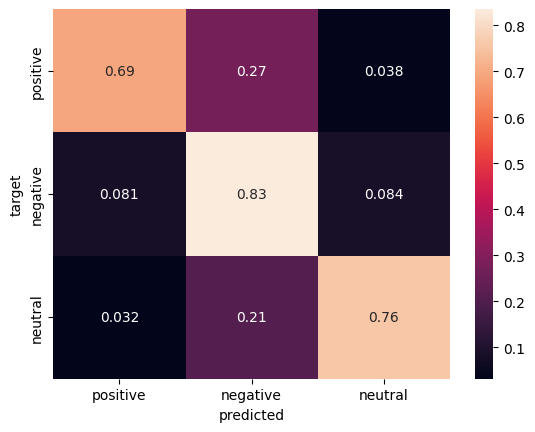

In [ ]:
plot_cm(cm1)

In [ ]:
logr.coef_

array([[ 0.06434018, -0.29658116, -0.36731337, ..., -0.12808528,
        -0.22370094, -0.42387816],
       [ 0.00501383,  0.39290756,  0.38905187, ...,  0.29203822,
         0.54322653,  0.62943969],
       [-0.069354  , -0.0963264 , -0.0217385 , ..., -0.16395293,
        -0.31952559, -0.20556153]])

(array([  1.,   0.,   0.,   0.,   1.,   1.,   3.,   1.,   6.,   3.,   5.,
          5.,   7.,  23.,  44., 153., 460., 772., 812., 531., 316., 152.,
         81.,  35.,  27.,  17.,   8.,   9.,   8.,   2.,   6.,   2.,   4.,
          1.,   1.,   0.,   0.,   0.,   1.,   2.]),
 array([-4.15029972, -3.92367992, -3.69706012, -3.47044032, -3.24382052,
        -3.01720073, -2.79058093, -2.56396113, -2.33734133, -2.11072153,
        -1.88410173, -1.65748193, -1.43086213, -1.20424234, -0.97762254,
        -0.75100274, -0.52438294, -0.29776314, -0.07114334,  0.15547646,
         0.38209626,  0.60871605,  0.83533585,  1.06195565,  1.28857545,
         1.51519525,  1.74181505,  1.96843485,  2.19505465,  2.42167444,
         2.64829424,  2.87491404,  3.10153384,  3.32815364,  3.55477344,
         3.78139324,  4.00801303,  4.23463283,  4.46125263,  4.68787243,
         4.91449223]),
 <BarContainer object of 40 artists>)

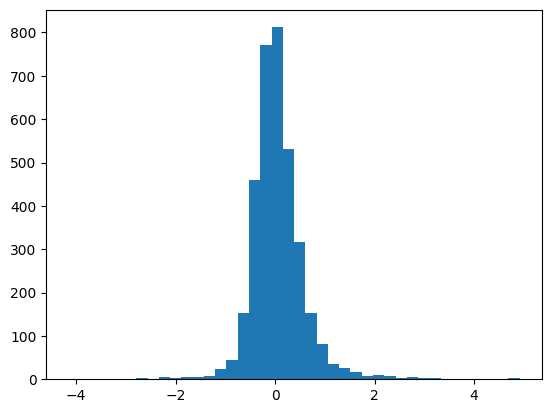

In [ ]:
plt.hist(logr.coef_[0], bins=40)

In [ ]:
# code for binary classification instead of mutliclass classification
# binary_target_list = [target_map['positive'], target_map['negative']]
# df_b_train = df_train[df_train['target'].isin(binary_target_list)]
# df_b_test = df_test[df_test['target'].isin(binary_target_list)]
# In [ ]:
# df_b_train.head()
# X_train = vectorizer.fit_transform(df_b_train['text'])
# X_test = vectorizer.transform(df_b_test['text'])
# In [ ]:
# Y_train = df_b_train['target']
# Y_test = df_b_test['target']
# In [ ]:
# model = LogisticRegression(max_iter=500)
# model.fit(X_train, Y_train)
# print("Train acc:", model.score(X_train, Y_train))
# print("Test acc:", model.score(X_test, Y_test))

In [ ]:
word_map = vectorizer.vocabulary_
len(word_map)

3500

In [ ]:
# since distribution is positive, neutral, negative. negative words have positive
# coefficients and positive meaning words have negative coefficients.

threshold = 3

for word, index in word_map.items():
  weight = logr.coef_[0][index]
  if weight> threshold:
    print(word, weight)

sad 4.914492229685143
miss 4.587773945804462
sick 3.2862498865485126
sorry 4.860298020578673
hate 3.6388585291538242
bored 3.13987973154644
tired 3.2144065625485174
sucks 3.439106999265545
stupid 3.0418214591880095
fail 3.1635490732466276


In [ ]:
threshold = -2

for word, index in word_map.items():
  weight = logr.coef_[0][index]
  if weight< threshold:
    print(word, weight)

love -4.150299719042778
hope -2.6926269560539113
happy -2.2573570946906494
better -2.2856643040280753
nice -2.333158952049026
awesome -2.9378623451645494
good -2.2014099905034445
thank -2.1783622417160093
thanks -3.093604257497206
great -2.6563925617639
excited -2.0239917661504045
hopefully -2.5633665557220886
amazing -2.255940667013925
glad -2.6367277762843315
